In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Simple RNN to predict Google's stock price

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Import the training set

In [23]:
dataset_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/RNN-Based-Stock-Prediction-master/RNN-Based-Stock-Prediction-master/Google_Stock_Price_Train.csv')
dataset_train

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [24]:
training_set = dataset_train.iloc[:, 1:2].values #creates a numpy array training_set

In [25]:
training_set.dtype

dtype('float64')

In [26]:
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

## Feature Scaling

Normalization is applied to the data now.

In [27]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set_scaled = sc.fit_transform(training_set)

In [28]:
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

## Creating Data Structure with 60 timesteps (3 months) and 1 output

In [29]:
X_train = [] #Initialization with an empty list
Y_train = [] #Initialization with an empty list
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    Y_train.append(training_set_scaled[i,0])
# Turning lists into Numpy arrays
X_train, Y_train = np.array(X_train), np.array(Y_train)

In [30]:
X_train

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
        0.08497656],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
        0.08471612],
       ...,
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
        0.93796041]])

In [31]:
X_train.shape

(1198, 60)

## Adding a new dimension

### Reshaping

In [32]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [33]:
X_train

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.07846566],
        [0.08034452],
        [0.08497656]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.08034452],
        [0.08497656],
        [0.08627874]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.08497656],
        [0.08627874],
        [0.08471612]],

       ...,

       [[0.92106928],
        [0.92438053],
        [0.93048218],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.92438053],
        [0.93048218],
        [0.9299055 ],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.93048218],
        [0.9299055 ],
        [0.93113327],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

## Building the RNN architecture

In [34]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


In [35]:
regressor = Sequential()

In [36]:
regressor.add(LSTM(units = 64, return_sequences = True, input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.25))

In [37]:
regressor.add(LSTM(units = 64, return_sequences = True))
regressor.add(Dropout(0.25))
regressor.add(LSTM(units = 64, return_sequences = True))
regressor.add(Dropout(0.25))
regressor.add(LSTM(units = 64, return_sequences = False))
regressor.add(Dropout(0.25))

In [38]:
regressor.add(Dense(units= 1))

In [39]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

## Training the RNN model

In [40]:
regressor.fit(X_train,Y_train, epochs = 50, batch_size = 32)

Epoch 1/50
38/38 [==============================] - 15s 131ms/step - loss: 0.0341
Epoch 2/50
38/38 [==============================] - 7s 173ms/step - loss: 0.0066
Epoch 3/50
38/38 [==============================] - 5s 133ms/step - loss: 0.0050
Epoch 4/50
38/38 [==============================] - 5s 131ms/step - loss: 0.0061
Epoch 5/50
38/38 [==============================] - 7s 179ms/step - loss: 0.0051
Epoch 6/50
38/38 [==============================] - 5s 131ms/step - loss: 0.0050
Epoch 7/50
38/38 [==============================] - 7s 176ms/step - loss: 0.0048
Epoch 8/50
38/38 [==============================] - 5s 136ms/step - loss: 0.0048
Epoch 9/50
38/38 [==============================] - 5s 133ms/step - loss: 0.0042
Epoch 10/50
38/38 [==============================] - 7s 182ms/step - loss: 0.0050
Epoch 11/50
38/38 [==============================] - 6s 163ms/step - loss: 0.0039
Epoch 12/50
38/38 [==============================] - 8s 209ms/step - loss: 0.0042
Epoch 13/50
38/38 [=====

## Testing the RNN model

In [41]:
dataset_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/RNN-Based-Stock-Prediction-master/RNN-Based-Stock-Prediction-master/Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:,1:2].values
real_stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

In [42]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [43]:
inputs

array([[0.9299055 ],
       [0.93113327],
       [0.92750577],
       [0.94415507],
       [0.93876032],
       [0.93403527],
       [0.93483518],
       [0.9313937 ],
       [0.94636878],
       [0.96569685],
       [0.97510976],
       [0.95966962],
       [0.97808617],
       [1.        ],
       [0.98076494],
       [0.97083116],
       [0.98450406],
       [0.96054394],
       [0.9371419 ],
       [0.92841729],
       [0.90804747],
       [0.8771858 ],
       [0.92153434],
       [0.93809063],
       [0.93165414],
       [0.95254483],
       [0.88812412],
       [0.88637547],
       [0.87032145],
       [0.88563137],
       [0.90743359],
       [0.91571173],
       [0.89941588],
       [0.91805566],
       [0.9089404 ],
       [0.9024853 ],
       [0.89456061],
       [0.91600938],
       [0.9132934 ],
       [0.88979835],
       [0.86589404],
       [0.89030062],
       [0.90335962],
       [0.89642086],
       [0.91777662],
       [0.93176576],
       [0.94114145],
       [0.957

In [44]:
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [45]:
from keras.models import load_model
regressor.save('RNN_model_trained.h5')

In [46]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 3s 3s/step


In [47]:
predicted_stock_price

array([[786.6418 ],
       [784.6794 ],
       [783.0808 ],
       [782.08185],
       [782.1616 ],
       [783.8572 ],
       [786.9617 ],
       [790.62646],
       [794.1981 ],
       [797.2389 ],
       [799.51624],
       [800.9393 ],
       [801.57776],
       [801.72876],
       [801.66095],
       [802.35767],
       [804.41425],
       [808.01306],
       [812.3776 ],
       [815.5406 ]], dtype=float32)

## Visualization of results

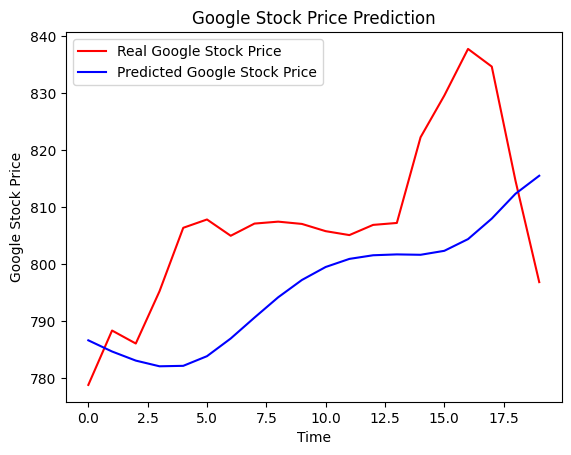

In [48]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()